<a href="https://colab.research.google.com/github/Akash-Venkat/Spark-Foundation-Intern/blob/main/Supervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Prediction using Supervised ML**

To predict the marks based on the study hours


STEP 1 :
import the necessary packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
%matplotlib inline               

STEP 2 : Getting the dataset

In [ ]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print(data)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


STEP 3 : Here we should check for any NAN values or the value which is very high or low compared to other values and then it should be removed.

In [ ]:
data.isnull().values.any()

False

STEP 4 : Visualizing the dataset

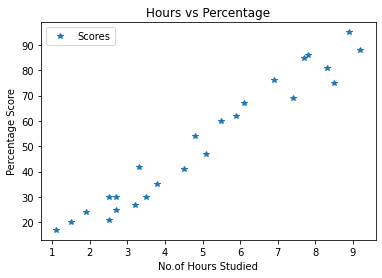

In [ ]:
#By plotting x(no.of hrs studied) and y-axis(marks) we came to know both are directly proportional
data.plot(x='Hours', y='Scores', style='*')
plt.title('Hours vs Percentage')  
plt.xlabel('No.of Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [ ]:
#To get the value of x and y from the data set by iloc and slicing operation
x =data.iloc[:, 0].values  
y =data.iloc[:, 1].values  
print(x)
print(y)

[2.5 5.1 3.2 8.5 3.5 1.5 9.2 5.5 8.3 2.7 7.7 5.9 4.5 3.3 1.1 8.9 2.5 1.9
 6.1 7.4 2.7 4.8 3.8 6.9 7.8]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


Split the data for training and testing note that train_size should be maximum(80%) and test_size is minimum(20%) and random_state should be given to not change in value of training and testing data on every runtime

In [ ]:
#Splitting of data
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=0)
print(X_train, X_test, y_train, y_test)

[3.8 1.9 7.8 6.9 1.1 5.1 7.7 3.3 8.3 9.2 6.1 3.5 2.7 5.5 2.7 8.5 2.5 4.8
 8.9 4.5] [1.5 3.2 7.4 2.5 5.9] [35 24 86 76 17 47 85 42 81 88 67 30 25 60 30 75 21 54 95 41] [20 27 69 30 62]


STEP 5 : Training the algorithm

In [ ]:
#The algorith used to train the data is linear regression imported from sklearn
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train.reshape(-1,1), y_train.reshape(-1,1)) 
print("Training Sucessful")

Training Sucessful


STEP 6 : Plotting linear regression Line

[[26.79480124 52.56250809 33.73226078 86.25874013 36.70545772 16.88414476
  93.19619966 56.52677068 84.27660883 28.77693254 78.33021494 60.49103328
  46.6161142  34.72332643 12.91988217 90.22300272 26.79480124 20.84840735
  62.47316457 75.357018   28.77693254 49.58931115 39.67865467 70.40168976
  79.32128059]]


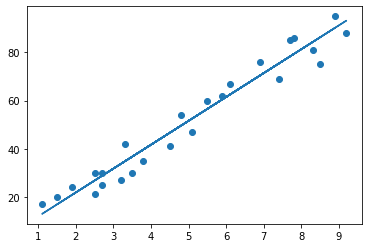

In [ ]:
# Plotting the regression line
line = regressor.coef_*x+regressor.intercept_            #finding slope i.e y=mx+c
print(line)
# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line.reshape(-1,1));
plt.show()

STEP 7 : Predict the marks using the trained algorithm

In [ ]:
# Here we are comparing the actual and predicted value in the dataframe
y_pred = regressor.predict(np.array(X_test).reshape(-1,1)) # Predicting the scores
y_pred=np.array(y_pred).reshape(1,-1)
print(y_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred[0]})  
print(df)

[20 27 69 30 62]
   Actual  Predicted
0      20  16.884145
1      27  33.732261
2      69  75.357018
3      30  26.794801
4      62  60.491033


STEP 8 : Check the correctness of the algorithm

To check the correctness of the algorithm here we use mean absolute error there is other algorithm like R square to check algorith performance

In [ ]:
from sklearn import metrics 
print(y_pred[0]) 
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred[0])) 

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]
Mean Absolute Error: 4.183859899002982


Predict with our own data

In [ ]:
# Here we can test with our own data
hours = float(input("Enter no.of hrs studied to predict your mark "))
hours=np.array(hours).reshape(-1,1)
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours[0][0]))
print("Predicted Score = {}".format(own_pred[0][0]))

Enter no.of hrs studied to predict your mark 9.25
No of Hours = 9.25
Predicted Score = 93.69173248737539
